## Handling Outliers

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generating 200 samples having mean of 60 and std_dev of 12
def generate_scores(mean=60,std_dev=12,num_samples=200):
  np.random.seed(27)
  scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
  scores = np.round(scores, decimals=0)
  return scores
data = generate_scores()

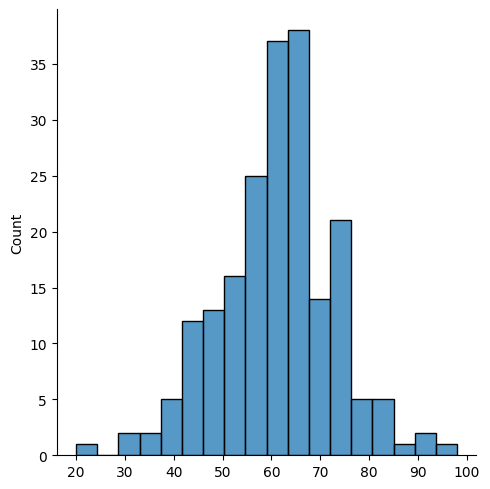

In [3]:
sns.displot(data)   # Histogram of data

In [4]:
df = pd.DataFrame(data,columns=['score'])      # converting generated data into dataframe for further process

# Removing Outliers using Standard Deviation Method

In [5]:
df.mean()   # mean of data

score    61.005
dtype: float64

In [6]:
df.std()   # standard deviation of data

score    11.854434
dtype: float64

In [7]:
# lower limit and upper limit
lower_limit_std = df.mean() - 3*df.std()
upper_limit_std = df.mean() + 3*df.std()
print(lower_limit_std)
print(upper_limit_std)

score    25.441697
dtype: float64
score    96.568303
dtype: float64


In [8]:
# filtering values using lower and upper limit
df_std=df[(df[['score']]>=25.44)&(df[['score']]<=96.57)]
df_std

,score
0,75.0
1,56.0
2,67.0
3,65.0
4,63.0
...,...
195,76.0
196,67.0
197,74.0
198,NaN


In [9]:
df_std.isna().sum()  # checking null values after applying lower and upper limit in df

score    2
dtype: int64

In [10]:
df_std.dropna()   # dropping null values for removing outliers

,score
0,75.0
1,56.0
2,67.0
3,65.0
4,63.0
...,...
194,42.0
195,76.0
196,67.0
197,74.0


# Removing Outliers using Z-score Method

In [11]:
df_Zscore=df['z_score'] = ( df['score'] - df['score'].mean() ) / df['score'].std()         # using z-score formula for removing outliers   z = ( x - mean ) / std
df_Zscore.head()

0    1.180571
1   -0.422205
2    0.505718
3    0.337005
4    0.168291
Name: score, dtype: float64

In [12]:
df_z_score = df[(df['z_score']>-3) & (df['z_score']<3)]     # filtering outliers
df_z_score

,score,z_score
0,75.0,1.180571
1,56.0,-0.422205
2,67.0,0.505718
3,65.0,0.337005
4,63.0,0.168291
...,...,...
194,42.0,-1.603198
195,76.0,1.264928
196,67.0,0.505718
197,74.0,1.096214


# Removing Outliers using Inter-Quantile Range Method

<Axes: >

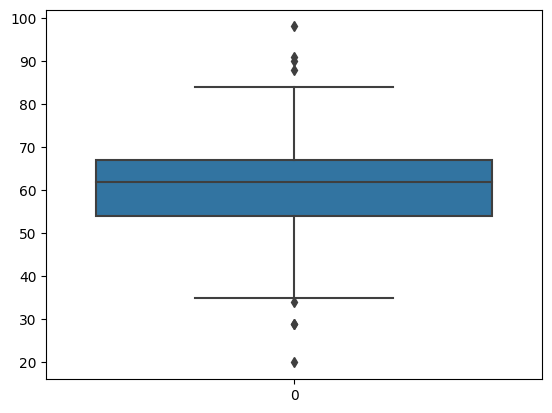

In [13]:
sns.boxplot(data)

In [14]:
df.describe()

,score,z_score
count,200.000000,2.000000e+02
mean,61.005000,-2.131628e-16
std,11.854434,1.000000e+00
min,20.000000,-3.459043e+00
25%,54.000000,-5.909181e-01
50%,62.000000,8.393484e-02
75%,67.000000,5.057179e-01
max,98.000000,3.120773e+00


In [15]:
# Finding Outilers using IQR method
# Formula -- q1 - 1.4 * IQR  and q3 + 1.5 * IQR
IQR = 67 - 54
lower_limit_IQR = 54 - 1.5 * IQR
upper_limit_IQR = 67 + 1.5 * IQR
print(upper_limit_IQR)
print(lower_limit_IQR)

86.5
34.5


In [16]:
df_IQR = df[(df['score'] > 34.5 ) &  ( df['score'] < 86.5 )]   # Filtering outliers
df_IQR

,score,z_score
0,75.0,1.180571
1,56.0,-0.422205
2,67.0,0.505718
3,65.0,0.337005
4,63.0,0.168291
...,...,...
194,42.0,-1.603198
195,76.0,1.264928
196,67.0,0.505718
197,74.0,1.096214


 # Removing Outliers using Percentile Method

In [17]:
#  finding lower and upper limit using percentile
lower_limit_per, upper_limit_per = np.percentile(a=df,q=[0.5,99.5])
print(upper_limit_per)
print(lower_limit_per)

90.005
-2.6998335925602515


In [18]:
df_percentile = df[(df['score']>lower_limit_per) & (df['score']<upper_limit_per)]  # filtering outliers
print(df_percentile)

     score   z_score
0     75.0  1.180571
1     56.0 -0.422205
2     67.0  0.505718
3     65.0  0.337005
4     63.0  0.168291
..     ...       ...
194   42.0 -1.603198
195   76.0  1.264928
196   67.0  0.505718
197   74.0  1.096214
199   53.0 -0.675275

[198 rows x 2 columns]


<Axes: >

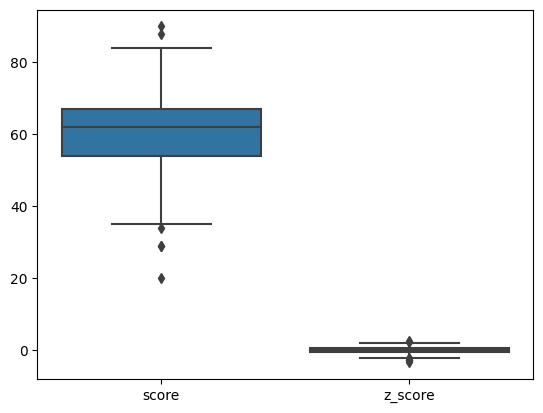

In [20]:
sns.boxplot(df_percentile)